In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Fix our dataset
N_data_points = 1000
x = linspace(0, 1, N_data_points) # Domain
y = sin(2*pi*x)                   # Codomain

# Least squares

We can use different basis. Usually, we use monomials or polinomials, but they are generalistic.

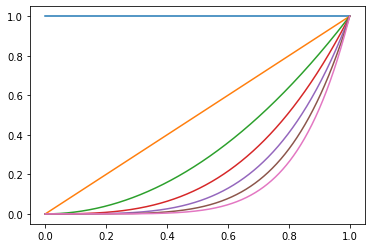

In [3]:
# Polinomial
degree = 6
basis  = zeros((N_data_points, degree + 1)) # Vectorised N_data_points (rows)

for d in range(degree + 1):
    basis[:,d] = x**d

# Our basis
plot(x, basis)

We have $y_i, i=1,...,\text{N_data_points}$. 

Now, we would like:

* Solve the problem: find $p$ in $P^{d}$, such that $p$ is at "minimal distance from data points"

$p = \sum_{i=0}^{d} b_i \cdot p_i$

$b$ is basis, where $b_i := x^i$

$d$ is degree

## Loss function

It is the distance (or error) from your approximation and the dataset

$$
\text{Loss} = \frac{1}{2} \sum_{i=1}^{\text{N_data_points}} |p(x_i) - y_i|^2
= \frac{1}{2} \sum_{i=1}^{\text{N_data_points}} |\sum_{j=0}^{d} p_j \cdot b_j(x_i) - y_i|^2
$$

In the case of *least squares*, the *loss function* tries to minimise the $L_2$ norm. We can rewrite in term of matrices:

$$
\text{Loss} = \frac{1}{2N} \lVert B \cdot p - Y \rVert_{l_2}^{2}
$$

where $B$ is the basis, $p$ is the polinomial vector (unknown) and $Y$ are our values.

We want *Loss* to be minimum.

To do so, we want to find the minimum argument of:

$$
\text{ArgMin}(\text{Loss}(p))
$$

We will have a quadratic behaviour. The minimum of the function is our minimum Loss. So, to find the optimal $p$, we need to equalise the derivative of the function to zero.

$$
\frac{\partial}{\partial p_i} \frac{1}{2} \sum_k \sum_j | B_{kj} p_j - y_k |^2
$$

$$
= \sum_k ( \frac{\partial}{\partial p_i} \sum_j (B_{kj} p_j - y_k )) \cdot \sum_k \sum_j | B_{kj} p_j - y_k |
$$


where 

$$
\sum_k ( \frac{\partial}{\partial p_i} \sum_j (B_{kj} p_j - y_k )) = B_{ki}
$$

So

$$
\frac{\partial}{\partial p_i} \frac{1}{2} \sum_k \sum_j | B_{kj} p_j - y_k |^2 = \sum_k \sum_j | B_{kj} p_j - y_k | \cdot B_{ki}
$$

It can be rewritten as:

$$
\frac{\partial L}{\partial p_i} = B^T BP - B^T Y = 0
$$

The solution:

$$
P = (B^T B)^{-1} B^T Y
$$

*Left inverse of B*: $(B^T B)^{-1}$

We cannot invert a rectangular matrix unless we are in the spae spanned by the matrix itself: So we multiply by the tranposition. This leads to the *image of B*

In [4]:
# Representation of the loss:

def Loss(p, y):
    return .5 * (basis.dot(p) - y).dot(basis.dot(p) - y)

# If we have the identity, we are done, but the following becomes meaningless
BtB = basis.T.dot(basis)

# Basis evaluated at Y - projection on the basis space of your DATA
BtY = basis.T.dot(y)

In [5]:
BtY.shape

(7,)

In [6]:
# Neural network of one layer and five nodes
# Linear activation
# --------------------
# Most of the times, we apply regression but changing basis functions
# Backward propagation uses this way of Loss minimisation

In [7]:
# To get the average (DC value)
one = basis[:,0]
DC = one.T.dot(y)
# It is almost zero because the DC value of a sine is 0
DC

9.601694439531627e-15

In [8]:
# The sum of all the values
one.T.dot(one)
# In this case, is N

1000.0

In [9]:
# To compute p
p = (one.T.dot(y))/(one.T.dot(one))
p

9.601694439531628e-18

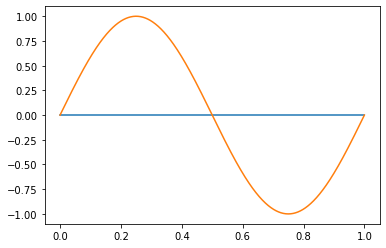

In [10]:
# Evaluation with a constant:
plot(x, one.dot(p))   # We are getting just the DC approximation
plot(x,y)

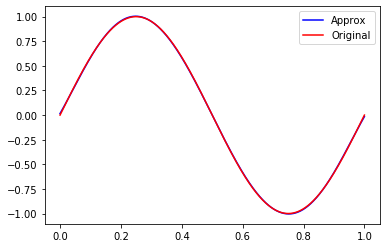

In [11]:
# For the general case (degree 4)
p = linalg.solve(BtB, BtY)

# Evaluate
plot(x, basis.dot(p), 'b')
plot(x,y, 'r')
legend(["Approx", "Original"])

In [12]:
# This is the error - Average of the distances
L = Loss(p, y)/N_data_points
L
# To improve this, we can choose another basis. For instance, Fourier basis, sigmoid or unit steps
# The train the neural network is to minimise the Loss function with a collection of basis
# Extreme learning methods: when the training is performed just solving a linear system


9.362448104579231e-06

We have for extreme learning methods: 

$p(x) = \sum_{i=0}^{d} b_i(x) \cdot p_i$

We have for neural networks:

$p(x) = \sum_{i=0}^{d} b_i(Cx) \cdot p_i$

where we tune C and p in order to get better results. C are coefficients or weights

### Loss annotations

We can define the loss for an ADAS as the distance of the center of the car to the lane center

> **Achtung!** Do not trust in neural networks in ranges where they were not trained to. Example: training a NN with the currency exchange trends for predicting the future. DO NOT DO THAT!

In [13]:
basis.shape

(1000, 7)

In [15]:
# You can go further with the degree unless you are far from the final degree. 
# If that happens, the inversion of the matrix is outbound

### Another loss function

We originally had:

$$
\text{Loss} = \frac{1}{2N} \lVert B \cdot p - Y \rVert_{l_2}^{2}
$$

What happens if I want to use the following function as Loss:

$$
\text{Loss} = \frac{1}{2} \lVert B \cdot p - f \rVert_{l_2 ([0,1])}^{2} = \frac{1}{2} \int_{0}^{1} (p(x)-f(x))^2 dx
$$

Now, the integral is continuous in a non-continuous domain. We need to approx the integral:

$$
\approx \frac{1}{2} \sum_{i=1}^{N} \frac{1}{N} |p(x_i) - y_i|^2
$$

This is the same loss function... So, to improve, we can use a better approximation to the integral

> Least squares approximation is a projection method which is also named as Integral L2 
